# Exercises
# 100 numpy exercises
from https://github.com/rougier/numpy-100

#### 1. Import the numpy package under the name `np`
`hint: import … as`

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### 2. Print the numpy version and the configuration 
`hint: np.__version__, np.show_config)`

In [4]:
#print(np.__version__)
#np.show_config()

In [3]:
def show_array2(Z):
    Z = np.atleast_2d(Z)
    rows,cols = Z.shape
    fig = plt.figure(figsize=(cols/4.,rows/4.), dpi=172)
    ax = plt.subplot(111)
    plt.imshow(Z, cmap='bone_r', extent=[0,cols,0,rows],
               vmin=0, vmax=max(1,Z.max()), interpolation='nearest',
               origin='upper')
    plt.xticks([]), plt.yticks([])
    for pos in ['top', 'bottom', 'right', 'left']:
        ax.spines[pos].set_edgecolor('k')
        ax.spines[pos].set_alpha(.25)
    print(Z)
    plt.show()

rows,cols = 5, 9

#### 51. Create a structured array representing a position (x,y) and a color (r,g,b) 
`hint: dtype`

In [323]:
Z = np.zeros(10, [ ('position', [ ('x', float, (1,)),
                                  ('y', float, (1,))]),
                   ('color',    [ ('r', float, (1,)),
                                  ('g', float, (1,)),
                                  ('b', float, (1,))])])
print(Z)

[(([0.], [0.]), ([0.], [0.], [0.])) (([0.], [0.]), ([0.], [0.], [0.]))
 (([0.], [0.]), ([0.], [0.], [0.])) (([0.], [0.]), ([0.], [0.], [0.]))
 (([0.], [0.]), ([0.], [0.], [0.])) (([0.], [0.]), ([0.], [0.], [0.]))
 (([0.], [0.]), ([0.], [0.], [0.])) (([0.], [0.]), ([0.], [0.], [0.]))
 (([0.], [0.]), ([0.], [0.], [0.])) (([0.], [0.]), ([0.], [0.], [0.]))]


#### 52. Consider a random vector with shape (100,2) representing coordinates, find point by point distances 
`hint: np.atleast_2d, T, np.sqrt`

In [331]:
Z = np.random.random((10,2))
X,Y = np.atleast_2d(Z[:,0], Z[:,1])
D = np.sqrt( (X-X.T)**2 + (Y-Y.T)**2)
print(D.reshape(100,1))

# Much faster with scipy
#import scipy
#import scipy.spatial
#Z = np.random.random((10,2))
#D = scipy.spatial.distance.cdist(Z,Z)
#print(D)

[[0.        ]
 [0.77843153]
 [0.28126284]
 [0.2540747 ]
 [0.46421814]
 [0.70733865]
 [0.42765534]
 [0.604862  ]
 [0.89521635]
 [0.48719575]
 [0.77843153]
 [0.        ]
 [0.88139379]
 [0.82101601]
 [0.33619541]
 [0.55923584]
 [0.43036858]
 [0.17398208]
 [0.45091031]
 [0.5227553 ]
 [0.28126284]
 [0.88139379]
 [0.        ]
 [0.06042159]
 [0.63150624]
 [0.60809929]
 [0.45657934]
 [0.72255457]
 [0.85071642]
 [0.42762945]
 [0.2540747 ]
 [0.82101601]
 [0.06042159]
 [0.        ]
 [0.57342724]
 [0.56391968]
 [0.39689237]
 [0.66222291]
 [0.80024665]
 [0.37453505]
 [0.46421814]
 [0.33619541]
 [0.63150624]
 [0.57342724]
 [0.        ]
 [0.5848789 ]
 [0.28052501]
 [0.17039471]
 [0.62923318]
 [0.42272638]
 [0.70733865]
 [0.55923584]
 [0.60809929]
 [0.56391968]
 [0.5848789 ]
 [0.        ]
 [0.33312659]
 [0.50993334]
 [0.26662761]
 [0.22177397]
 [0.42765534]
 [0.43036858]
 [0.45657934]
 [0.39689237]
 [0.28052501]
 [0.33312659]
 [0.        ]
 [0.28912459]
 [0.47102834]
 [0.14258798]
 [0.604862  ]
 [0.17

#### 53. How to convert a float (32 bits) array into an integer (32 bits) in place?
`hint: view and [:] =`

In [338]:
Z = (np.random.rand(10)*100).astype(np.float32)
print(Z)
Y = Z.view(np.int32)
print(Y)
Y[:] = Z
print(Y)

[33.046844  39.9613    30.543257  34.057255   8.603593  18.766882
 98.78378    3.7130334 56.4264    88.67043  ]
[1107570680 1109383263 1106532503 1107835553 1091151953 1100358291
 1120244044 1080926807 1113699490 1118918467]
[33 39 30 34  8 18 98  3 56 88]


#### 54. How to read the following file? 
 1, 2, 3, 4, 5  
 6,  ,  , 7, 8  
  ,  , 9,10,11  
`hint: np.genfromtxt`

In [340]:
from io import StringIO

# Fake file
s = StringIO('''1, 2, 3, 4, 5

                6,  ,  , 7, 8

                 ,  , 9,10,11
''')
Z = np.genfromtxt(s, delimiter=",", dtype=np.int32)
print(Z)

[[ 1  2  3  4  5]
 [ 6 -1 -1  7  8]
 [-1 -1  9 10 11]]


#### 55. What is the equivalent of enumerate for numpy arrays? 
`hint: np.ndenumerate, np.ndindex`

In [8]:
Z = np.arange(9).reshape(3,3)
print(Z)
print()
for index, value in np.ndenumerate(Z):
    print(index, value)
print()
for index in np.ndindex(Z.shape):
    print(index, Z[index])


[[0 1 2]
 [3 4 5]
 [6 7 8]]

(0, 0) 0
(0, 1) 1
(0, 2) 2
(1, 0) 3
(1, 1) 4
(1, 2) 5
(2, 0) 6
(2, 1) 7
(2, 2) 8

(0, 0) 0
(0, 1) 1
(0, 2) 2
(1, 0) 3
(1, 1) 4
(1, 2) 5
(2, 0) 6
(2, 1) 7
(2, 2) 8


#### 56. Generate a generic 2D Gaussian-like array 
`hint: np.meshgrid, np.exp`

In [9]:
X, Y = np.meshgrid(np.linspace(-1,1,10), np.linspace(-1,1,10))
D = np.sqrt(X*X+Y*Y)
sigma, mu = 1.0, 0.0
G = np.exp(-( (D-mu)**2 / ( 2.0 * sigma**2 ) ) )
print(G)

[[0.36787944 0.44822088 0.51979489 0.57375342 0.60279818 0.60279818
  0.57375342 0.51979489 0.44822088 0.36787944]
 [0.44822088 0.54610814 0.63331324 0.69905581 0.73444367 0.73444367
  0.69905581 0.63331324 0.54610814 0.44822088]
 [0.51979489 0.63331324 0.73444367 0.81068432 0.85172308 0.85172308
  0.81068432 0.73444367 0.63331324 0.51979489]
 [0.57375342 0.69905581 0.81068432 0.89483932 0.9401382  0.9401382
  0.89483932 0.81068432 0.69905581 0.57375342]
 [0.60279818 0.73444367 0.85172308 0.9401382  0.98773022 0.98773022
  0.9401382  0.85172308 0.73444367 0.60279818]
 [0.60279818 0.73444367 0.85172308 0.9401382  0.98773022 0.98773022
  0.9401382  0.85172308 0.73444367 0.60279818]
 [0.57375342 0.69905581 0.81068432 0.89483932 0.9401382  0.9401382
  0.89483932 0.81068432 0.69905581 0.57375342]
 [0.51979489 0.63331324 0.73444367 0.81068432 0.85172308 0.85172308
  0.81068432 0.73444367 0.63331324 0.51979489]
 [0.44822088 0.54610814 0.63331324 0.69905581 0.73444367 0.73444367
  0.69905581 0

#### 57. How to randomly place p elements in a 2D array? 
`hint: np.put, np.random.choice`

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


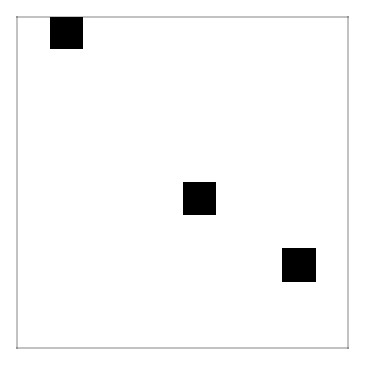

In [25]:
n = 10
p = 3
Z = np.zeros((n,n))
np.put(Z, np.random.choice(range(n*n), p, replace=False),1)
show_array2(Z)

[[1.   0.   0.   0.75 0.   0.25 1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.75 0.   0.   0.   0.   0.   0.   0.   0.25 0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.75 0.   0.   0.   0.  ]
 [0.   0.   0.   0.5  0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.5  0.   0.   0.   0.   0.  ]]


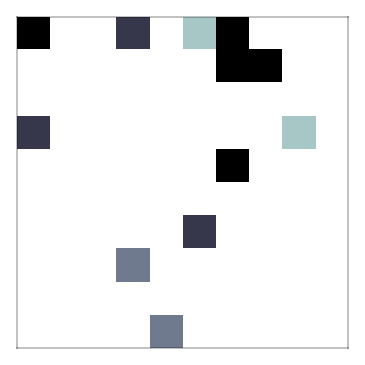

In [32]:
n = 10
p = 5
Z = np.zeros((n,n))
np.put(Z, np.random.choice(range(n*n), p, replace=False),1)
np.put(Z, np.random.choice(range(n*n), p-1, replace=False),.75)
np.put(Z, np.random.choice(range(n*n), p-2, replace=False),.5)
np.put(Z, np.random.choice(range(n*n), p-3, replace=False),.25)
show_array2(Z)

#### 58. Subtract the mean of each row of a matrix 
`hint: mean(axis=,keepdims=)`

[[0.17231484 0.61291847 0.49388507 0.23517725 0.65065638 0.53867237
  0.4979579  0.13782407 0.10276503 0.26911778]
 [0.10727899 0.58312749 0.44282892 0.30052148 0.18911167 0.59352243
  0.82402888 0.99726417 0.11522638 0.78718978]
 [0.791457   0.41702407 0.97547795 0.72458723 0.41220109 0.62973809
  0.28249033 0.58431238 0.20937786 0.35322232]
 [0.61700008 0.98742337 0.15928866 0.62941345 0.77432583 0.55108575
  0.00486261 0.87117275 0.75146212 0.37784476]
 [0.80574855 0.65789229 0.23610054 0.10903251 0.06697325 0.19174388
  0.42667734 0.30279115 0.92503688 0.69168331]]


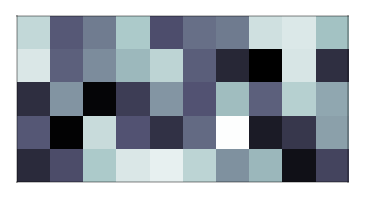

[[-0.19881407  0.24178955  0.12275615 -0.13595166  0.27952746  0.16754345
   0.12682899 -0.23330484 -0.26836388 -0.10201114]
 [-0.38673103  0.08911747 -0.0511811  -0.19348853 -0.30489835  0.09951241
   0.33001886  0.50325415 -0.37878364  0.29317976]
 [ 0.25346816 -0.12096476  0.43748912  0.1865984  -0.12578774  0.09174926
  -0.2554985   0.04632355 -0.32861097 -0.18476651]
 [ 0.04461214  0.41503543 -0.41309928  0.05702551  0.20193789 -0.02130218
  -0.56752533  0.29878482  0.17907418 -0.19454317]
 [ 0.36438058  0.21652432 -0.20526743 -0.33233546 -0.37439472 -0.24962409
  -0.01469063 -0.13857682  0.48366891  0.25031534]]


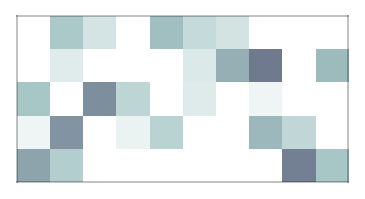

In [45]:
X = np.random.rand(5, 10)
show_array2(X)
# Recent versions of numpy
Y = X - X.mean(axis=1, keepdims=True)

# Older versions of numpy
#Y = X - X.mean(axis=1).reshape(-1, 1)

show_array2(Y)

[[0.52579843 0.14614086 0.86683449 0.57510696]
 [0.40578618 0.50112991 0.90452306 0.26165152]
 [0.09376007 0.35383285 0.02405527 0.6948723 ]]


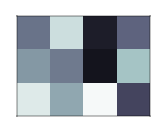

[[-0.00267175 -0.38232933  0.33836431  0.04663677]
 [-0.11248649 -0.01714276  0.38625039 -0.25662114]
 [-0.19787005  0.06220273 -0.26757486  0.40324217]]


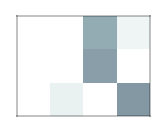

[[7.13827159e-06 1.46175715e-01 1.14490406e-01 2.17498861e-03]
 [1.26532103e-02 2.93874186e-04 1.49189366e-01 6.58544116e-02]
 [3.91525565e-02 3.86917968e-03 7.15963034e-02 1.62604252e-01]]


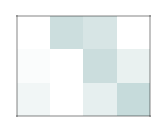

[[-0.06570492  0.08046365  0.04877834 -0.06353707]
 [-0.04434451 -0.05670384  0.09219165  0.0088567 ]
 [-0.03015302 -0.06543639  0.00229073  0.09329868]]


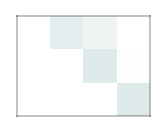

[[0.59150335 0.0656772  0.81805615 0.63864403]
 [0.45013068 0.55783375 0.81233141 0.25279483]
 [0.12391309 0.41926924 0.02176453 0.60157362]]


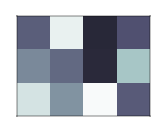

In [54]:
X = np.random.rand(3, 4)
show_array2(X)
Y = X - X.mean(axis=1, keepdims=True)
show_array2(Y)
Z = Y * Y
show_array2(Z)
W = Z - Z.mean(axis=1, keepdims=True)
show_array2(W)
V = X - W
show_array2(V)

#### 59. How to sort an array by the nth column? 
`hint: argsort`

[[ 8 55 44  9]
 [11  0 24 89]
 [46 91 95 32]
 [56 66 17 54]
 [86 74 60 27]]


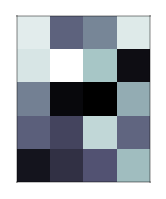

[[11  0 24 89]
 [ 8 55 44  9]
 [56 66 17 54]
 [86 74 60 27]
 [46 91 95 32]]


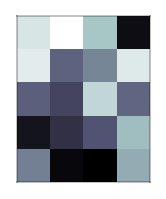

[[56 66 17 54]
 [11  0 24 89]
 [ 8 55 44  9]
 [86 74 60 27]
 [46 91 95 32]]


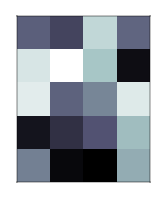

[[ 8 55 44  9]
 [86 74 60 27]
 [46 91 95 32]
 [56 66 17 54]
 [11  0 24 89]]


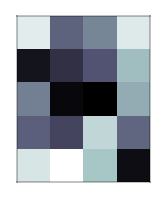

In [74]:
Z = np.random.randint(0,100,(5,4))
show_array2(Z[Z[:,0].argsort()])
show_array2(Z[Z[:,1].argsort()])
show_array2(Z[Z[:,2].argsort()])
show_array2(Z[Z[:,3].argsort()])

[[93 63 76  7]
 [83 49 79 78]
 [69  6 17 84]
 [52 11 85  9]
 [27 56 64 42]]


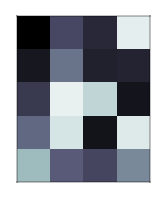

[[93 63 76  7]
 [27 56 64 42]
 [83 49 79 78]
 [52 11 85  9]
 [69  6 17 84]]


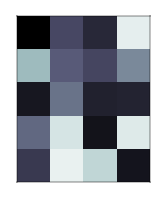

[[52 11 85  9]
 [83 49 79 78]
 [93 63 76  7]
 [27 56 64 42]
 [69  6 17 84]]


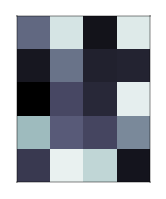

[[69  6 17 84]
 [83 49 79 78]
 [27 56 64 42]
 [52 11 85  9]
 [93 63 76  7]]


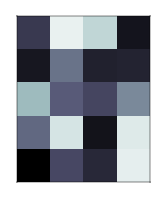

In [75]:
## [::-1] slices the result in reverse order(descending order)
Z = np.random.randint(0,100,(5,4))
show_array2(Z[Z[:,0].argsort()[::-1]])
show_array2(Z[Z[:,1].argsort()[::-1]])
show_array2(Z[Z[:,2].argsort()[::-1]])
show_array2(Z[Z[:,3].argsort()[::-1]])

#### 60. How to tell if a given 2D array has null columns? 
`hint: any, ~`  
* nums.any(axis=0): Returns a boolean array of shape (10,) with True at positions where there is at least one non-zero element in the corresponding column of nums, and False otherwise. The axis=0 parameter specifies that the operation should be performed along the columns.  
* ~nums.any(axis=0): Inverts the boolean values in the array from step 2 using the bitwise NOT operator ~. Now, True indicates that a column has all zeros, and False indicates that there is at least one non-zero element in the column.  
* (~nums.any(axis=0)).any(): Checks if there is at least one True value in the boolean array from step 3, i.e., if there is any column in nums with all zeros.  


In [88]:
Z = np.random.randint(0,3,(2,10))
print(Z)
print((Z.any(axis=0)))
print((~Z.any(axis=0)))
print((Z.any(axis=0)).any())
print((~Z.any(axis=0)).any())


# null : np.nan
Z=np.array([
    [0,0,1,np.nan],
    [0,1,2,np.nan],
    [0,4,5,np.nan]
])
print(Z)
print(np.isnan(Z).all(axis=0))


[[0 0 0 0 2 2 2 0 1 0]
 [2 2 2 0 0 1 2 2 1 1]]
[ True  True  True False  True  True  True  True  True  True]
[False False False  True False False False False False False]
True
True
[[ 0.  0.  1. nan]
 [ 0.  1.  2. nan]
 [ 0.  4.  5. nan]]
[False False False  True]


#### 61. Find the nearest value from a given value in an array 
`hint: np.abs, argmin, flat`

In [90]:
Z = np.random.uniform(0,1,10)
print(Z)
z = 0.5
m = Z.flat[np.abs(Z - z).argmin()]
print(m)

[0.62546035 0.17469158 0.22652263 0.72115681 0.7311294  0.95156663
 0.59819013 0.49884806 0.89071503 0.95923459]
0.4988480614730427


#### 62. Considering two arrays with shape (1,3) and (3,1), how to compute their sum using an iterator? 
`hint: np.nditer`

In [95]:
A = np.arange(3).reshape(3,1)
print(A)
B = np.arange(3).reshape(1,3)
print(B)
it = np.nditer([A,B,None])
for x,y,z in it: z[...] = x + y
print(it.operands[2])

[[0]
 [1]
 [2]]
[[0 1 2]]
[[0 1 2]
 [1 2 3]
 [2 3 4]]


#### 63. Create an array class that has a name attribute 
`hint: class method`

In [96]:
class NamedArray(np.ndarray):
    def __new__(cls, array, name="no name"):
        obj = np.asarray(array).view(cls)
        obj.name = name
        return obj
    def __array_finalize__(self, obj):
        if obj is None: return
        self.name = getattr(obj, 'name', "no name")

Z = NamedArray(np.arange(10), "range_10")
print (Z.name)

range_10


#### 64. Consider a given vector, how to add 1 to each element indexed by a second vector (be careful with repeated indices)? 
`hint: np.bincount | np.add.at`

In [104]:
Z = np.ones(10)
print(Z)
I = np.random.randint(0,len(Z),5)
print(I)
Z += np.bincount(I, minlength=len(Z))
print(Z)

Z = np.ones(10)
np.add.at(Z, I, 1)
print(Z)

Z = np.zeros(10)
print(Z)
Z += np.bincount(I, minlength=len(Z))
print(Z)

Z = np.zeros(10)
np.add.at(Z, I, 1)
print(Z)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[7 1 1 2 6]
[1. 3. 2. 1. 1. 1. 2. 2. 1. 1.]
[1. 3. 2. 1. 1. 1. 2. 2. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 2. 1. 0. 0. 0. 1. 1. 0. 0.]
[0. 2. 1. 0. 0. 0. 1. 1. 0. 0.]


#### 65. How to accumulate elements of a vector (X) to an array (F) based on an index list (I)? 
`hint: np.bincount`

In [122]:
#X = [1,2,3,4,5,6]
#I = [1,3,9,3,4,1]
#F = np.bincount(I,X)
#print(F)

I = [1,1,3,3,5,5]
F = np.bincount(I)
print(F)

I = [1,3,3,1,5,5]
F = np.bincount(I)
print(F)

I = [1,3,2,1,5,5,0,0,0,0,0,0]
F = np.bincount(I)
print(F)

X = [1,2,3,4,5,6]
I = [1,1,3,3,5,5]
F = np.bincount(I,X)
print(F)

[0 2 0 2 0 2]
[0 2 0 2 0 2]
[6 2 1 1 0 2]
[ 0.  3.  0.  7.  0. 11.]


#### 66. Considering a (w,h,3) image of (dtype=ubyte), compute the number of unique colors 
`hint: np.unique`

In [134]:
w, h = 256, 256
I = np.random.randint(0, 4, (h, w, 3)).astype(np.ubyte)
colors = np.unique(I.reshape(-1, 3), axis=0)
n = len(colors)
print(n)

# Faster version
w, h = 256, 256
I = np.random.randint(0,4,(h,w,3), dtype=np.uint8)
# View each pixel as a single 24-bit integer, rather than three 8-bit bytes
I24 = np.dot(I.astype(np.uint32),[1,256,65536])
# Count unique colours
n = len(np.unique(I24))
print(n)

64
64


#### 67. Considering a four dimensions array, how to get sum over the last two axis at once? 
`hint: sum(axis=(-2,-1))`

In [137]:
A = np.random.randint(0,10,(3,4,3,4))
# solution by passing a tuple of axes (introduced in numpy 1.7.0)
sum = A.sum(axis=(-2,-1))
print(sum)
# solution by flattening the last two dimensions into one
# (useful for functions that don't accept tuples for axis argument)
sum = A.reshape(A.shape[:-2] + (-1,)).sum(axis=-1)
print(sum)

[[57 61 54 63]
 [54 64 58 52]
 [45 53 58 56]]
[[57 61 54 63]
 [54 64 58 52]
 [45 53 58 56]]


#### 68. Considering a one-dimensional vector D, how to compute means of subsets of D using a vector S of same size describing subset  indices? 
`hint: np.bincount`

In [139]:
D = np.random.uniform(0,1,100)
S = np.random.randint(0,10,100)
D_sums = np.bincount(S, weights=D)
D_counts = np.bincount(S)
D_means = D_sums / D_counts
print(D_means)

# Pandas solution as a reference due to more intuitive code
import pandas as pd
print(pd.Series(D).groupby(S).mean())

[0.62194867 0.63160308 0.42452921 0.52920394 0.48826825 0.3646541
 0.46208531 0.59537502 0.63806042 0.42262635]
0    0.621949
1    0.631603
2    0.424529
3    0.529204
4    0.488268
5    0.364654
6    0.462085
7    0.595375
8    0.638060
9    0.422626
dtype: float64


#### 69. How to get the diagonal of a dot product? 
`hint: np.diag`

In [143]:
A = np.random.uniform(0,1,(5,5))
B = np.random.uniform(0,1,(5,5))

# Slow version
print(np.diag(np.dot(A, B)))

# Fast version
print(np.sum(A * B.T, axis=1))

# Faster version
print(np.einsum("ij,ji->i", A, B))

[1.0638548  0.67656122 1.61282056 1.45499759 1.30044456]
[1.0638548  0.67656122 1.61282056 1.45499759 1.30044456]
[1.0638548  0.67656122 1.61282056 1.45499759 1.30044456]


#### 70. Consider the vector [1, 2, 3, 4, 5], how to build a new vector with 3 consecutive zeros interleaved between each value? 
`hint: array[::4]`

[[1 2 3 4 5]]


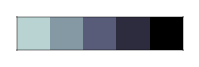

[[1. 0. 0. 0. 2. 0. 0. 0. 3. 0. 0. 0. 4. 0. 0. 0. 5.]]


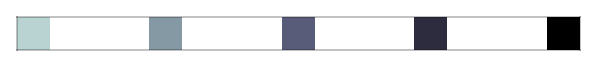

In [147]:
Z = np.array([1,2,3,4,5])
show_array2(Z)
nz = 3
Z0 = np.zeros(len(Z) + (len(Z)-1)*(nz))
Z0[::nz+1] = Z
show_array2(Z0)

#### 71. Consider an array of dimension (5,5,3), how to mulitply it by an array with dimensions (5,5)? 
`hint: array[:, :, None]`

In [152]:
A = np.ones((5,5,3))
B = 2*np.ones((5,5))
print(A * B[:,:,None])

[[[2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]]

 [[2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]]

 [[2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]]

 [[2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]]

 [[2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]]]


#### 72. How to swap two rows of an array? 
`hint: array[[]] = array[[]]`

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]]


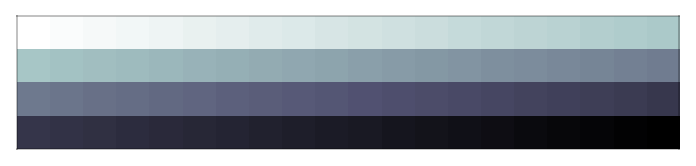

[[20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
 [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]]


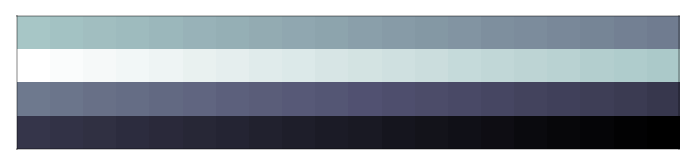

[[20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
 [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
 [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]]


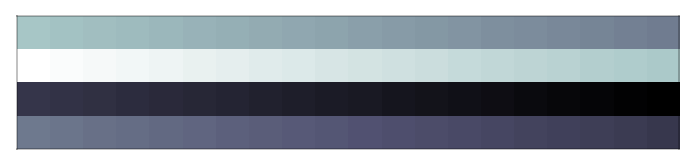

[[20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39  0  1  2  3
   4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
 [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 40 41 42 43
  44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]]


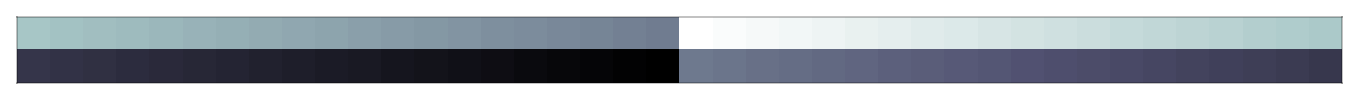

In [164]:
A = np.arange(80).reshape(4,20)
show_array2(A)
A[[0,1]] = A[[1,0]]
show_array2(A)
A[[2,3]] = A[[3,2]]
show_array2(A)
A = A.reshape(2,40)
show_array2(A) 

#### 73. Consider a set of 10 triplets describing 10 triangles (with shared vertices), find the set of unique line segments composing all the  triangles 
`hint: repeat, np.roll, np.sort, view, np.unique`

In [165]:
faces = np.random.randint(0,100,(10,3))
F = np.roll(faces.repeat(2,axis=1),-1,axis=1)
F = F.reshape(len(F)*3,2)
F = np.sort(F,axis=1)
G = F.view( dtype=[('p0',F.dtype),('p1',F.dtype)] )
G = np.unique(G)
print(G)

[(13, 15) (13, 25) (14, 37) (14, 94) (15, 25) (19, 47) (19, 87) (20, 22)
 (20, 33) (20, 68) (20, 87) (22, 68) (27, 47) (27, 94) (28, 47) (28, 52)
 (33, 87) (37, 94) (47, 52) (47, 87) (47, 94) (52, 62) (52, 86) (58, 66)
 (58, 77) (62, 86) (66, 77) (85, 97) (85, 99) (97, 99)]


#### 74. Given a sorted array C that corresponds to a bincount, how to produce an array A such that np.bincount(A) == C? 
`hint: np.repeat`

In [167]:
C = np.bincount([1,1,2,3,4,4,6])
A = np.repeat(np.arange(len(C)), C)
print(A)

[1 1 2 3 4 4 6]


[[ 1  2  3  5  8 13 21 34 55 89]]


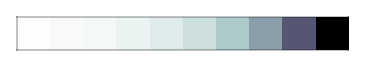

[[ 1  1  1  2  2  2  3  3  3  5  5  5  8  8  8 13 13 13 21 21 21 34 34 34
  55 55 55 89 89 89]]


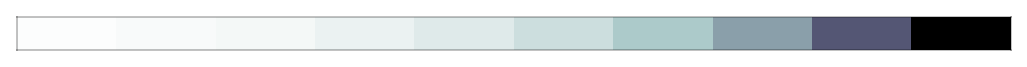

[[ 1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3
   3  3  3  5  5  5  5  5  5  5  5  5  8  8  8  8  8  8  8  8  8 13 13 13
  13 13 13 13 13 13 21 21 21 21 21 21 21 21 21 34 34 34 34 34 34 34 34 34
  55 55 55 55 55 55 55 55 55 89 89 89 89 89 89 89 89 89]]


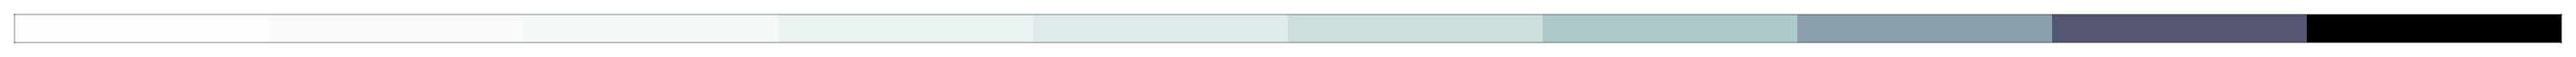

[[ 1  1  1  1  1  1  1  1  1  2]
 [ 2  2  2  2  2  2  2  2  3  3]
 [ 3  3  3  3  3  3  3  5  5  5]
 [ 5  5  5  5  5  5  8  8  8  8]
 [ 8  8  8  8  8 13 13 13 13 13]
 [13 13 13 13 21 21 21 21 21 21]
 [21 21 21 34 34 34 34 34 34 34]
 [34 34 55 55 55 55 55 55 55 55]
 [55 89 89 89 89 89 89 89 89 89]]


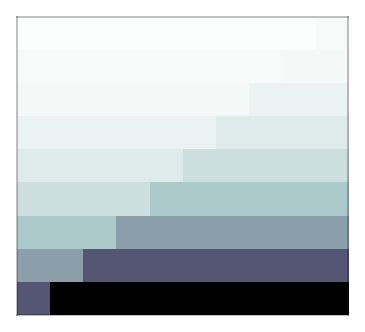

In [177]:

show_array2(X) 
X = np.repeat(X, 3)
show_array2(X)
X = np.repeat(X, 3)
show_array2(X)
X = X.reshape(9,10)
show_array2(X)

#### 75. How to compute averages using a sliding window over an array? 
`hint: np.cumsum, from numpy.lib.stride_tricks import sliding_window_view (np>=1.20.0)`

[[  1   2   3   5   8  13  21  34  55  89 144]]


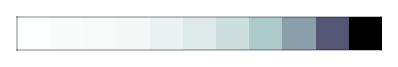

[[ 2.          3.33333333  5.33333333  8.66666667 14.         22.66666667
  36.66666667 59.33333333 96.        ]]


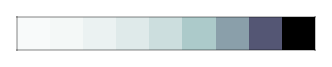

[[ 2.75  4.5   7.25 11.75 19.   30.75 49.75 80.5 ]]


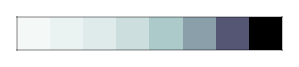

[[ 3.8  6.2 10.  16.2 26.2 42.4 68.6]]


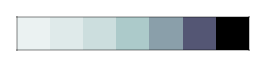

[[ 5.33333333  8.66666667 14.         22.66666667 36.66666667 59.33333333]]


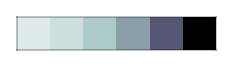

In [191]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n
#Z = np.arange(20)
Z = [1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144]
show_array2(Z) 
show_array2(moving_average(Z, n=3))
show_array2(moving_average(Z, n=4))
show_array2(moving_average(Z, n=5))
show_array2(moving_average(Z, n=6))

#or
#from numpy.lib.stride_tricks import sliding_window_view
#Z = np.arange(20)
#print(sliding_window_view(Z, window_shape=3).mean(axis=-1))

#### 76. Consider a one-dimensional array Z, build a two-dimensional array whose first row is (Z[0],Z[1],Z[2]) and each subsequent row is  shifted by 1 (last row should be (Z[-3],Z[-2],Z[-1]) 
`hint: from numpy.lib import stride_tricks, from numpy.lib.stride_tricks import sliding_window_view (np>=1.20.0)`

[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]
 [4 5 6]
 [5 6 7]
 [6 7 8]
 [7 8 9]]


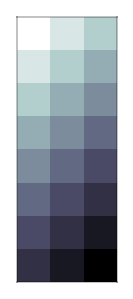

[[0 1 2 3 4]
 [1 2 3 4 5]
 [2 3 4 5 6]
 [3 4 5 6 7]
 [4 5 6 7 8]]


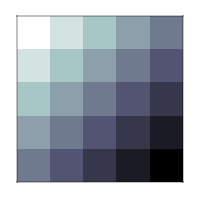

In [196]:
from numpy.lib import stride_tricks

def rolling(a, window):
    shape = (a.size - window + 1, window)
    strides = (a.strides[0], a.strides[0])
    return stride_tricks.as_strided(a, shape=shape, strides=strides)
Z = rolling(np.arange(10), 3)
show_array2(Z)
Z = rolling(np.arange(9), 5)
show_array2(Z)

[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]
 [4 5 6]
 [5 6 7]
 [6 7 8]
 [7 8 9]]


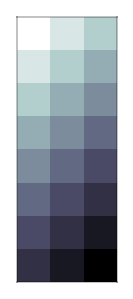

[[0 1 2 3 4]
 [1 2 3 4 5]
 [2 3 4 5 6]
 [3 4 5 6 7]
 [4 5 6 7 8]]


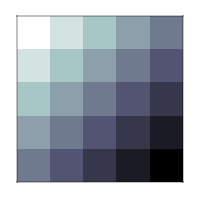

In [200]:
Z = np.arange(10)
Z = (sliding_window_view(Z, window_shape=3))
show_array2(Z)
Z = np.arange(9)
Z = (sliding_window_view(Z, window_shape=5))
show_array2(Z)

#### 77. How to negate a boolean, or to change the sign of a float inplace? 
`hint: np.logical_not, np.negative`

[[0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1]]


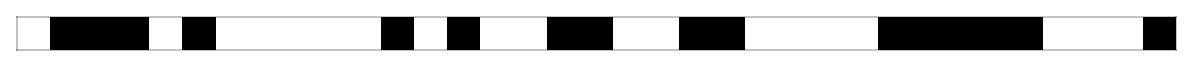

[[1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0]]


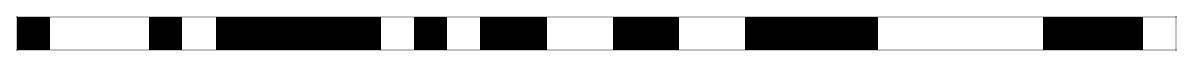

In [207]:
Z = np.random.randint(0,2,35)
show_array2(Z)
show_array2(np.logical_not(Z, out=Z))

[[ 0.15883762  0.35611567  0.07448428 -0.44900891  0.89096977 -0.7645971
   0.50232611 -0.54950596  0.4124981   0.73570275 -0.20426277 -0.69965601
   0.75161759  0.99586247  0.78122294 -0.32568547  0.44819019  0.83584299
  -0.17048692  0.90789083  0.37164419  0.53903977 -0.81362751 -0.42663298
   0.27964958  0.21198798 -0.92891825 -0.34168089 -0.4232084  -0.64543419
   0.67160682  0.40141752  0.46740032 -0.48266681  0.88653573]]


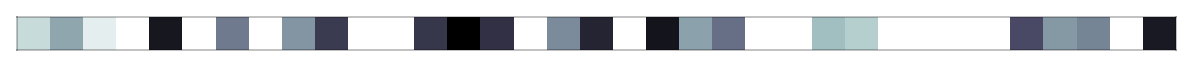

[[-0.15883762 -0.35611567 -0.07448428  0.44900891 -0.89096977  0.7645971
  -0.50232611  0.54950596 -0.4124981  -0.73570275  0.20426277  0.69965601
  -0.75161759 -0.99586247 -0.78122294  0.32568547 -0.44819019 -0.83584299
   0.17048692 -0.90789083 -0.37164419 -0.53903977  0.81362751  0.42663298
  -0.27964958 -0.21198798  0.92891825  0.34168089  0.4232084   0.64543419
  -0.67160682 -0.40141752 -0.46740032  0.48266681 -0.88653573]]


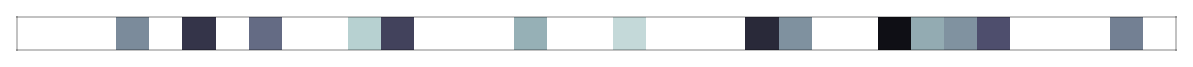

In [210]:
Z = np.random.uniform(-1.0,1.0,35)
show_array2(Z)
show_array2(np.negative(Z, out=Z))

#### 78. Consider 2 sets of points P0,P1 describing lines (2d) and a point p, how to compute distance from p to each line i (P0[i],P1[i])? 
`No hints provided...`

In [211]:
def distance(P0, P1, p):
    T = P1 - P0
    L = (T**2).sum(axis=1)
    U = -((P0[:,0]-p[...,0])*T[:,0] + (P0[:,1]-p[...,1])*T[:,1]) / L
    U = U.reshape(len(U),1)
    D = P0 + U*T - p
    return np.sqrt((D**2).sum(axis=1))

P0 = np.random.uniform(-10,10,(10,2))
P1 = np.random.uniform(-10,10,(10,2))
p  = np.random.uniform(-10,10,( 1,2))
print(distance(P0, P1, p))

[12.6001915   7.3175798   2.65503771  6.7126495   3.26747403  1.77267878
  3.03836693  1.34778084  3.68622965  2.92142246]


#### 79. Consider 2 sets of points P0,P1 describing lines (2d) and a set of points P, how to compute distance from each point j (P[j]) to each line i (P0[i],P1[i])? 
`No hints provided...`

In [213]:
#P0 = np.random.uniform(-10, 10, (10,2))
#P1 = np.random.uniform(-10,10,(10,2))
#p = np.random.uniform(-10, 10, (10,2))
#print(np.array([distance(P0,P1,p_i) for p_i in p]))

#### 80. Consider an arbitrary array, write a function that extract a subpart with a fixed shape and centered on a given element (pad with a `fill` value when necessary) 
`hint: minimum maximum`

In [220]:
'''
Z = np.random.randint(0,10,(10,10))
shape = (5,5)
fill  = 0
position = (1,1)

R = np.ones(shape, dtype=Z.dtype)*fill
P  = np.array(list(position)).astype(int)
Rs = np.array(list(R.shape)).astype(int)
Zs = np.array(list(Z.shape)).astype(int)

R_start = np.zeros((len(shape),)).astype(int)
R_stop  = np.array(list(shape)).astype(int)
Z_start = (P-Rs//2)
Z_stop  = (P+Rs//2)+Rs%2

R_start = (R_start - np.minimum(Z_start,0)).tolist()
Z_start = (np.maximum(Z_start,0)).tolist()
R_stop = np.maximum(R_start, (R_stop - np.maximum(Z_stop-Zs,0))).tolist()
Z_stop = (np.minimum(Z_stop,Zs)).tolist()

r = [slice(start,stop) for start,stop in zip(R_start,R_stop)]
z = [slice(start,stop) for start,stop in zip(Z_start,Z_stop)]
R[r] = Z[z]
print(Z)
print(R)
'''

'\nZ = np.random.randint(0,10,(10,10))\nshape = (5,5)\nfill  = 0\nposition = (1,1)\n\nR = np.ones(shape, dtype=Z.dtype)*fill\nP  = np.array(list(position)).astype(int)\nRs = np.array(list(R.shape)).astype(int)\nZs = np.array(list(Z.shape)).astype(int)\n\nR_start = np.zeros((len(shape),)).astype(int)\nR_stop  = np.array(list(shape)).astype(int)\nZ_start = (P-Rs//2)\nZ_stop  = (P+Rs//2)+Rs%2\n\nR_start = (R_start - np.minimum(Z_start,0)).tolist()\nZ_start = (np.maximum(Z_start,0)).tolist()\nR_stop = np.maximum(R_start, (R_stop - np.maximum(Z_stop-Zs,0))).tolist()\nZ_stop = (np.minimum(Z_stop,Zs)).tolist()\n\nr = [slice(start,stop) for start,stop in zip(R_start,R_stop)]\nz = [slice(start,stop) for start,stop in zip(Z_start,Z_stop)]\nR[r] = Z[z]\nprint(Z)\nprint(R)\n'

#### 81. Consider an array Z = [1,2,3,4,5,6,7,8,9,10,11,12,13,14], how to generate an array R = [[1,2,3,4], [2,3,4,5], [3,4,5,6], ..., [11,12,13,14]]? 
`hint: stride_tricks.as_strided, from numpy.lib.stride_tricks import sliding_window_view (np>=1.20.0)`

[[ 1  2  3  4]
 [ 2  3  4  5]
 [ 3  4  5  6]
 [ 4  5  6  7]
 [ 5  6  7  8]
 [ 6  7  8  9]
 [ 7  8  9 10]
 [ 8  9 10 11]
 [ 9 10 11 12]
 [10 11 12 13]
 [11 12 13 14]]


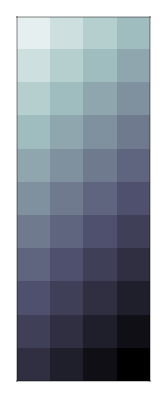

[[ 1  2  3  4]
 [ 2  3  4  5]
 [ 3  4  5  6]
 [ 4  5  6  7]
 [ 5  6  7  8]
 [ 6  7  8  9]
 [ 7  8  9 10]
 [ 8  9 10 11]
 [ 9 10 11 12]
 [10 11 12 13]
 [11 12 13 14]]


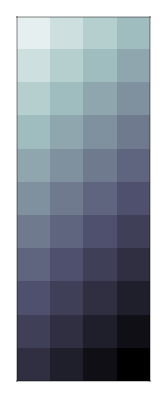

In [223]:
Z = np.arange(1,15,dtype=np.uint32)
R = stride_tricks.as_strided(Z,(11,4),(4,4))
show_array2(R)
#or
Z = np.arange(1, 15, dtype=np.uint32)
R = (sliding_window_view(Z, window_shape=4))
show_array2(R)

#### 82. Compute a matrix rank 
`hint: np.linalg.svd, np.linalg.matrix_rank`

In [224]:
Z = np.random.uniform(0,1,(10,10))
U, S, V = np.linalg.svd(Z) # Singular Value Decomposition
rank = np.sum(S > 1e-10)
print(rank)
#or
rank = np.linalg.matrix_rank(Z)
print(rank)

10
10


#### 83. How to find the most frequent value in an array?
`hint: np.bincount, argmax`

In [238]:
Z = np.random.randint(0,10,50)
print(Z)
print(np.bincount(Z))
print(np.bincount(Z).argmax())
print(np.bincount(Z).argmin())

[3 9 7 2 3 6 8 5 3 7 9 4 5 8 2 4 6 4 1 9 4 8 3 6 3 3 6 4 7 7 8 8 4 0 2 3 8
 7 4 9 0 2 4 7 0 5 0 8 1 1]
[4 3 4 7 8 3 4 6 7 4]
4
1


#### 84. Extract all the contiguous 3x3 blocks from a random 10x10 matrix 
`hint: stride_tricks.as_strided, from numpy.lib.stride_tricks import sliding_window_view (np>=1.20.0)`

In [239]:
Z = np.random.randint(0,5,(10,10))
n = 3
i = 1 + (Z.shape[0]-3)
j = 1 + (Z.shape[1]-3)
C = stride_tricks.as_strided(Z, shape=(i, j, n, n), strides=Z.strides + Z.strides)
print(C)

#or
Z = np.random.randint(0,5,(10,10))
print(sliding_window_view(Z, window_shape=(3, 3)))

[[[[3 4 3]
   [4 1 2]
   [3 4 4]]

  [[4 3 0]
   [1 2 1]
   [4 4 1]]

  [[3 0 0]
   [2 1 1]
   [4 1 4]]

  [[0 0 0]
   [1 1 4]
   [1 4 2]]

  [[0 0 1]
   [1 4 3]
   [4 2 2]]

  [[0 1 2]
   [4 3 3]
   [2 2 3]]

  [[1 2 0]
   [3 3 2]
   [2 3 4]]

  [[2 0 3]
   [3 2 4]
   [3 4 3]]]


 [[[4 1 2]
   [3 4 4]
   [2 0 2]]

  [[1 2 1]
   [4 4 1]
   [0 2 4]]

  [[2 1 1]
   [4 1 4]
   [2 4 3]]

  [[1 1 4]
   [1 4 2]
   [4 3 3]]

  [[1 4 3]
   [4 2 2]
   [3 3 3]]

  [[4 3 3]
   [2 2 3]
   [3 3 3]]

  [[3 3 2]
   [2 3 4]
   [3 3 3]]

  [[3 2 4]
   [3 4 3]
   [3 3 4]]]


 [[[3 4 4]
   [2 0 2]
   [1 2 4]]

  [[4 4 1]
   [0 2 4]
   [2 4 3]]

  [[4 1 4]
   [2 4 3]
   [4 3 0]]

  [[1 4 2]
   [4 3 3]
   [3 0 2]]

  [[4 2 2]
   [3 3 3]
   [0 2 1]]

  [[2 2 3]
   [3 3 3]
   [2 1 0]]

  [[2 3 4]
   [3 3 3]
   [1 0 0]]

  [[3 4 3]
   [3 3 4]
   [0 0 0]]]


 [[[2 0 2]
   [1 2 4]
   [3 2 2]]

  [[0 2 4]
   [2 4 3]
   [2 2 2]]

  [[2 4 3]
   [4 3 0]
   [2 2 4]]

  [[4 3 3]
   [3 0 2]
   [2 4 0]]

  [[3 3 3]
   

#### 85. Create a 2D array subclass such that Z[i,j] == Z[j,i] 
`hint: class method`

[[ 2 14  9  9  4]
 [14  8 15  0  9]
 [ 9 15  6 15 12]
 [ 9  0 15  7 14]
 [ 4  9 12 14  7]]


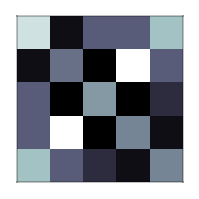

[[4 6 3]
 [6 5 3]
 [3 3 2]]


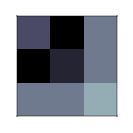

In [256]:
class Symetric(np.ndarray):
    def __setitem__(self, index, value):
        i,j = index
        super(Symetric, self).__setitem__((i,j), value)
        super(Symetric, self).__setitem__((j,i), value)

def symetric(Z):
    return np.asarray(Z + Z.T - np.diag(Z.diagonal())).view(Symetric)

S = symetric(np.random.randint(0,10,(5,5)))
#S[2,3] = 42
show_array2(S)

S = symetric(np.random.randint(0,10,(3,3)))
show_array2(S)

#### 86. Consider a set of p matrices with shape (n,n) and a set of p vectors with shape (n,1). How to compute the sum of of the p matrix products at once? (result has shape (n,1)) 
`hint: np.tensordot`

In [259]:
p, n = 5, 10
M = np.ones((p,n,n))
V = np.ones((p,n,1))
S = np.tensordot(M, V, axes=[[0, 2], [0, 1]])
print(S)
# It works, because:
# M is (p,n,n)
# V is (p,n,1)
# Thus, summing over the paired axes 0 and 0 (of M and V independently),
# and 2 and 1, to remain with a (n,1) vector.

[[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]

 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]

 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1

#### 87. Consider a 16x16 array, how to get the block-sum (block size is 4x4)? 
`hint: np.add.reduceat, from numpy.lib.stride_tricks import sliding_window_view (np>=1.20.0)`

In [264]:
Z = np.ones((16,16))
k = 4
S = np.add.reduceat(np.add.reduceat(Z, np.arange(0, Z.shape[0], k), axis=0),
                                       np.arange(0, Z.shape[1], k), axis=1)
print(S)

#or
Z = np.ones((16,16))
k = 4
windows = np.lib.stride_tricks.sliding_window_view(Z, (k, k))
S = windows[::k, ::k, ...].sum(axis=(-2, -1))
print(S)

#or
Z = np.ones((16, 16))
k = 4
print(sliding_window_view(Z, window_shape=(k, k))[::k, ::k].sum(axis=(-2, -1)))

[[16. 16. 16. 16.]
 [16. 16. 16. 16.]
 [16. 16. 16. 16.]
 [16. 16. 16. 16.]]
[[16. 16. 16. 16.]
 [16. 16. 16. 16.]
 [16. 16. 16. 16.]
 [16. 16. 16. 16.]]
[[16. 16. 16. 16.]
 [16. 16. 16. 16.]
 [16. 16. 16. 16.]
 [16. 16. 16. 16.]]


#### 88. How to implement the Game of Life using numpy arrays? 
`No hints provided...`

In [265]:
def iterate(Z):
    # Count neighbours
    N = (Z[0:-2,0:-2] + Z[0:-2,1:-1] + Z[0:-2,2:] +
         Z[1:-1,0:-2]                + Z[1:-1,2:] +
         Z[2:  ,0:-2] + Z[2:  ,1:-1] + Z[2:  ,2:])

    # Apply rules
    birth = (N==3) & (Z[1:-1,1:-1]==0)
    survive = ((N==2) | (N==3)) & (Z[1:-1,1:-1]==1)
    Z[...] = 0
    Z[1:-1,1:-1][birth | survive] = 1
    return Z

Z = np.random.randint(0,2,(50,50))
for i in range(100): Z = iterate(Z)
print(Z)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### 89. How to get the n largest values of an array 
`hint: np.argsort | np.argpartition`

In [266]:
Z = np.arange(10000)
np.random.shuffle(Z)
n = 5

# Slow
print (Z[np.argsort(Z)[-n:]])

# Fast
print (Z[np.argpartition(-Z,n)[:n]])

[9995 9996 9997 9998 9999]
[9998 9999 9997 9996 9995]


#### 90. Given an arbitrary number of vectors, build the cartesian product (every combinations of every item) 
`hint: np.indices`

In [267]:
def cartesian(arrays):
    arrays = [np.asarray(a) for a in arrays]
    shape = (len(x) for x in arrays)

    ix = np.indices(shape, dtype=int)
    ix = ix.reshape(len(arrays), -1).T

    for n, arr in enumerate(arrays):
        ix[:, n] = arrays[n][ix[:, n]]

    return ix

print (cartesian(([1, 2, 3], [4, 5], [6, 7])))

[[1 4 6]
 [1 4 7]
 [1 5 6]
 [1 5 7]
 [2 4 6]
 [2 4 7]
 [2 5 6]
 [2 5 7]
 [3 4 6]
 [3 4 7]
 [3 5 6]
 [3 5 7]]


#### 91. How to create a record array from a regular array? 
`hint: np.core.records.fromarrays`

In [268]:
Z = np.array([("Hello", 2.5, 3),
              ("World", 3.6, 2)])
R = np.core.records.fromarrays(Z.T,
                               names='col1, col2, col3',
                               formats = 'S8, f8, i8')
print(R)

[(b'Hello', 2.5, 3) (b'World', 3.6, 2)]


#### 92. Consider a large vector Z, compute Z to the power of 3 using 3 different methods 
`hint: np.power, *, np.einsum`

In [275]:
x = np.random.rand(int(5e6))
print(x)
%timeit np.power(x,3)
x = np.random.rand(int(5e6))
%timeit x*x*x
x = np.random.rand(int(5e6))
%timeit np.einsum('i,i,i->i',x,x,x)

[0.4859929  0.14788143 0.613465   ... 0.10807608 0.72360352 0.35875191]
134 ms ± 1.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
21.8 ms ± 2.69 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
13.4 ms ± 397 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### 93. Consider two arrays A and B of shape (8,3) and (2,2). How to find rows of A that contain elements of each row of B regardless of the order of the elements in B? 
`hint: np.where`

[[4 2 0]
 [0 3 2]
 [3 2 0]
 [2 0 2]
 [0 3 4]
 [3 0 2]
 [4 2 3]
 [2 0 0]]


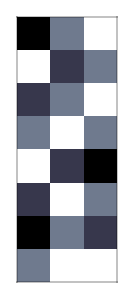

[[1 4]
 [3 0]]


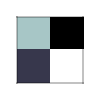

[0 4 6]


In [280]:
A = np.random.randint(0,5,(8,3))
show_array2(A)
B = np.random.randint(0,5,(2,2))
show_array2(B)
C = (A[..., np.newaxis, np.newaxis] == B)
rows = np.where(C.any((3,1)).all(1))[0]
print(rows)

#### 94. Considering a 10x3 matrix, extract rows with unequal values (e.g. [2,2,3]) 
`No hints provided...`

In [284]:
Z = np.random.randint(0,2,(10,3))
# print(Z)
# solution for arrays of all dtypes (including string arrays and record arrays)
E = np.all(Z[:,1:] == Z[:,:-1], axis=1)
U = Z[~E]
print(U)
# soluiton for numerical arrays only, will work for any number of columns in Z
U = Z[Z.max(axis=1) != Z.min(axis=1),:]
print(U)

[[0 1 0]
 [1 1 0]
 [0 0 1]
 [0 1 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]
 [0 1 0]]
[[0 1 0]
 [1 1 0]
 [0 0 1]
 [0 1 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]
 [0 1 0]]


#### 95. Convert a vector of ints into a matrix binary representation 
`hint: np.unpackbits`

[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0]]


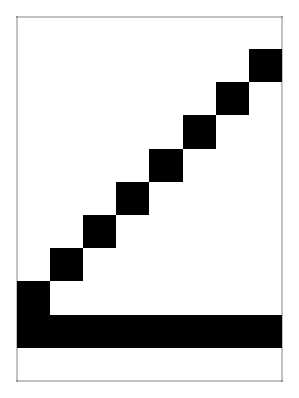

[[1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 2]
 [1 1 1 1 1 1 2 1]
 [1 1 1 1 1 2 1 1]
 [1 1 1 1 2 1 1 1]
 [1 1 1 2 1 1 1 1]
 [1 1 2 1 1 1 1 1]
 [1 2 1 1 1 1 1 1]
 [2 1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2 2]
 [1 1 1 1 1 1 1 1]]


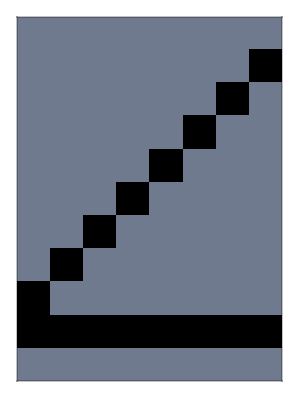

In [318]:
I = np.array([0, 1, 2, 4, 8, 16, 32, 64, 128, 255, 256])
B = ((I.reshape(-1,1) & (2**np.arange(8))) != 0).astype(int)
E = B[:,::-1]
show_array2(E)
F = E + 1
show_array2(F)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1]
 [0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1]
 [0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1]
 [0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1]
 [0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0]
 [0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1]
 [0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1]
 [0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0]
 [0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1]
 [0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1]
 [0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0]
 [0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1]
 [0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1]
 [1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0]]


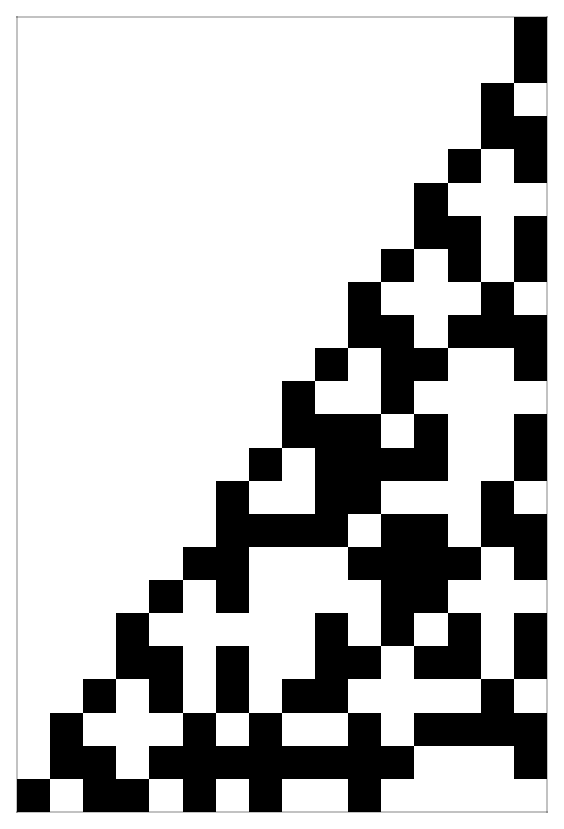

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2]
 [1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2]
 [1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2]
 [1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1]
 [1 1 1 1 1 1 1 1 1 1 2 2 1 2 2 2]
 [1 1 1 1 1 1 1 1 1 2 1 2 2 1 1 2]
 [1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1]
 [1 1 1 1 1 1 1 1 2 2 2 1 2 1 1 2]
 [1 1 1 1 1 1 1 2 1 2 2 2 2 1 1 2]
 [1 1 1 1 1 1 2 1 1 2 2 1 1 1 2 1]
 [1 1 1 1 1 1 2 2 2 2 1 2 2 1 2 2]
 [1 1 1 1 1 2 2 1 1 1 2 2 2 2 1 2]
 [1 1 1 1 2 1 2 1 1 1 1 2 2 1 1 1]
 [1 1 1 2 1 1 1 1 1 2 1 2 1 2 1 2]
 [1 1 1 2 2 1 2 1 1 2 2 1 2 2 1 2]
 [1 1 2 1 2 1 2 1 2 2 1 1 1 1 2 1]
 [1 2 1 1 1 2 1 2 1 1 2 1 2 2 2 2]
 [1 2 2 1 2 2 2 2 2 2 2 2 1 1 1 2]
 [2 1 2 2 1 2 1 2 1 1 2 1 1 1 1 1]]


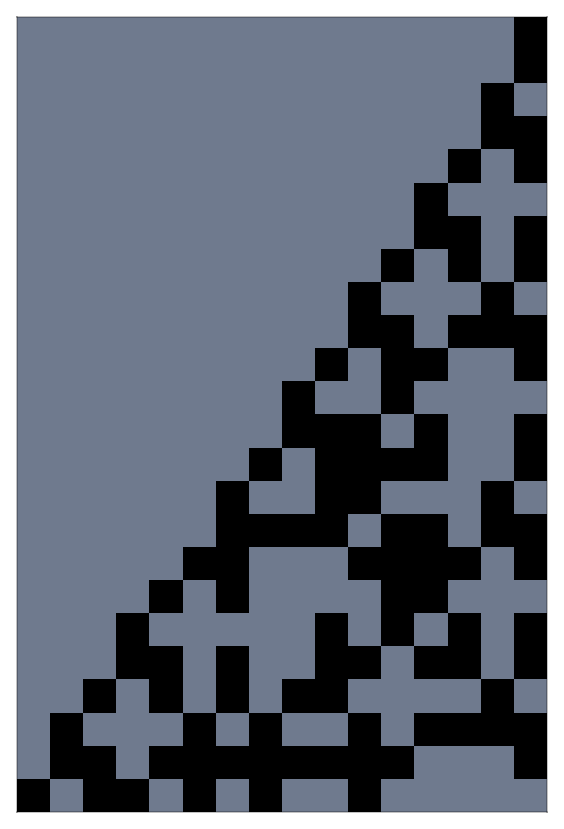

In [323]:
I = np.array([1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368])
B = ((I.reshape(-1,1) & (2**np.arange(16))) != 0).astype(int)
E = B[:,::-1]
show_array2(E)
F = E + 1
show_array2(F)

[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 1]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0 1]
 [0 0 0 0 0 1 1 0]
 [0 0 0 0 0 1 1 1]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 1]
 [0 0 0 0 1 0 1 0]
 [0 0 0 0 1 0 1 1]
 [0 0 0 0 1 1 0 0]
 [0 0 0 0 1 1 0 1]
 [0 0 0 0 1 1 1 0]
 [0 0 0 0 1 1 1 1]]


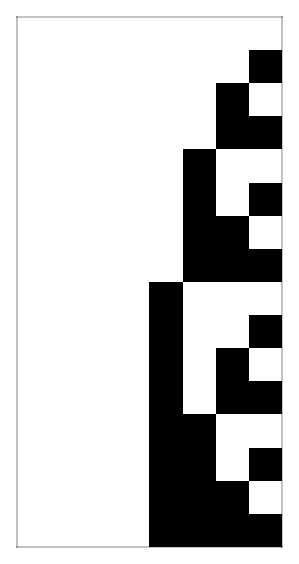

[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 1 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 1 0]
 [0 0 0 0 1 1 0 0]
 [0 0 0 0 1 1 1 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 1 0]
 [0 0 0 1 0 1 0 0]
 [0 0 0 1 0 1 1 0]
 [0 0 0 1 1 0 0 0]
 [0 0 0 1 1 0 1 0]
 [0 0 0 1 1 1 0 0]
 [0 0 0 1 1 1 1 0]]


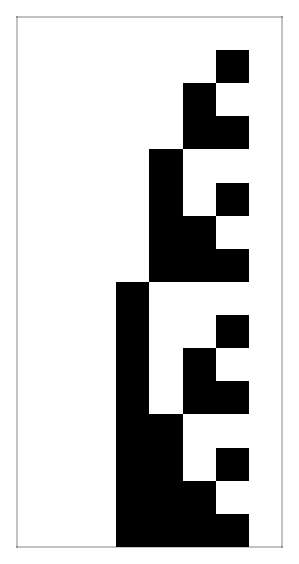

[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 1 1 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 1 0 1 0 0]
 [0 0 0 1 1 0 0 0]
 [0 0 0 1 1 1 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 1 0 0 1 0 0]
 [0 0 1 0 1 0 0 0]
 [0 0 1 0 1 1 0 0]
 [0 0 1 1 0 0 0 0]
 [0 0 1 1 0 1 0 0]
 [0 0 1 1 1 0 0 0]
 [0 0 1 1 1 1 0 0]]


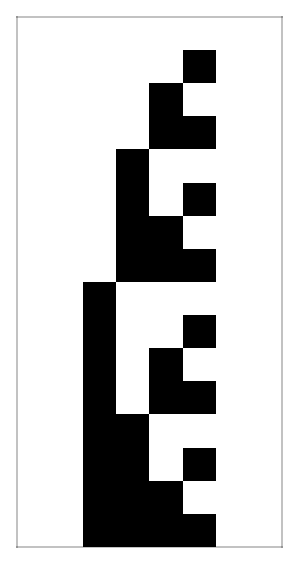

In [305]:
I = np.arange(0,16,1)
B = ((I.reshape(-1,1) & (2**np.arange(8))) != 0).astype(int)
E = B[:,::-1]
show_array2(E)

I = np.arange(0,32,2)
B = ((I.reshape(-1,1) & (2**np.arange(8))) != 0).astype(int)
E = B[:,::-1]
show_array2(E)

I = np.arange(0,64,4)
B = ((I.reshape(-1,1) & (2**np.arange(8))) != 0).astype(int)
E = B[:,::-1]
show_array2(E)

#### 96. Given a two dimensional array, how to extract unique rows? 
`hint: np.ascontiguousarray | np.unique`

In [9]:
Z = np.random.randint(0,2,(6,3))
T = np.ascontiguousarray(Z).view(np.dtype((np.void, Z.dtype.itemsize * Z.shape[1])))
_, idx = np.unique(T, return_index=True)
uZ = Z[idx]
print(uZ)

#or
uZ = np.unique(Z, axis=0)
print(uZ)

[[0 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 1]
 [1 1 0]]
[[0 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 1]
 [1 1 0]]


#### 97. Considering 2 vectors A & B, write the einsum equivalent of inner, outer, sum, and mul function 
`hint: np.einsum`

[[4.79867799]]


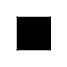

[[5.74723662e-02 8.81009242e-02 3.26943194e-01 1.64699574e-01
  7.53150974e-01 2.32526597e-02 2.78465316e-01 3.85912307e-01
  3.55562986e-04 3.29430988e-02]]


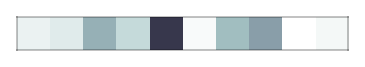

[[2.11129598]]


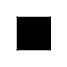

[[5.74723662e-02 1.04472882e-01 2.17819118e-01 6.62501559e-02
  3.53086822e-01 3.08601332e-02 2.14787959e-01 3.60688997e-01
  4.22603531e-04 3.52212218e-02]
 [4.84658646e-02 8.81009242e-02 1.83684658e-01 5.58680859e-02
  2.97754543e-01 2.60240380e-02 1.81128512e-01 3.04165380e-01
  3.56377280e-04 2.97016999e-02]
 [8.62651503e-02 1.56812213e-01 3.26943194e-01 9.94404797e-02
  5.29977967e-01 4.63205921e-02 3.22393471e-01 5.41388717e-01
  6.34321494e-04 5.28665200e-02]
 [1.42877765e-01 2.59722244e-01 5.41503872e-01 1.64699574e-01
  8.77782826e-01 7.67190766e-02 5.33968334e-01 8.96682027e-01
  1.05060313e-03 8.75608539e-02]
 [1.22591289e-01 2.22845624e-01 4.64618533e-01 1.41314732e-01
  7.53150974e-01 6.58261310e-02 4.58152927e-01 7.69366775e-01
  9.01433419e-04 7.51285403e-02]
 [4.33045885e-02 7.87187910e-02 1.64123524e-01 4.99185249e-02
  2.66045763e-01 2.32526597e-02 1.61839590e-01 2.71773891e-01
  3.18425589e-04 2.65386762e-02]
 [7.45109764e-02 1.35445554e-01 2.82395110e-01 8.58910836e

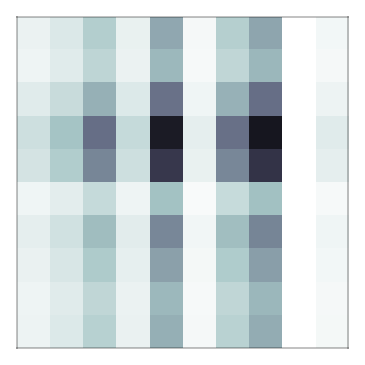

In [12]:
# Make sure to read: http://ajcr.net/Basic-guide-to-einsum/

A = np.random.uniform(0,1,10)
B = np.random.uniform(0,1,10)

show_array2(np.einsum('i->', A))       # np.sum(A)
show_array2(np.einsum('i,i->i', A, B)) # A * B
show_array2(np.einsum('i,i', A, B))    # np.inner(A, B)
show_array2(np.einsum('i,j->ij', A, B))    # np.outer(A, B)

#### 98. Considering a path described by two vectors (X,Y), how to sample it using equidistant samples ?
`hint: np.cumsum, np.interp`

In [13]:
phi = np.arange(0, 10*np.pi, 0.1)
a = 1
x = a*phi*np.cos(phi)
y = a*phi*np.sin(phi)

dr = (np.diff(x)**2 + np.diff(y)**2)**.5 # segment lengths
r = np.zeros_like(x)
r[1:] = np.cumsum(dr)                # integrate path
r_int = np.linspace(0, r.max(), 200) # regular spaced path
x_int = np.interp(r_int, r, x)       # integrate path
y_int = np.interp(r_int, r, y)

#### 99. Given an integer n and a 2D array X, select from X the rows which can be interpreted as draws from a multinomial distribution with n degrees, i.e., the rows which only contain integers and which sum to n. 
`hint: np.logical_and.reduce, np.mod`

In [15]:
X = np.asarray([[1.0, 0.0, 3.0, 8.0],
                [2.0, 0.0, 1.0, 1.0],
                [1.5, 2.5, 1.0, 0.0]])
n = 4
M = np.logical_and.reduce(np.mod(X, 1) == 0, axis=-1)
M &= (X.sum(axis=-1) == n)
print(X[M])

[[2. 0. 1. 1.]]


#### 100. Compute bootstrapped 95% confidence intervals for the mean of a 1D array X (i.e., resample the elements of an array with replacement N times, compute the mean of each sample, and then compute percentiles over the means). 
`hint: np.percentile`

In [20]:
X = np.random.randn(100) # random 1D array
N = 1000 # number of bootstrap samples
idx = np.random.randint(0, X.size, (N, X.size))
means = X[idx].mean(axis=1)
confint = np.percentile(means, [2.5, 97.5])
print(confint)

[-0.31436862  0.07258524]
